In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
# 65 大气压 20-330

result11 = np.zeros((3720))
i = 0
nu = [f"{x:04d}" for x in range(0,3720)]
i =0
for mm in nu:
    data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/air/TRY/CESM_PSL_'+mm+'_.nc')
    plot65 = data.variables['PSL'][0,100,0:121]
    plot65two = data.variables['PSL'][0,100,-160:-1]
    P65 = np.hstack((plot65two,plot65))
    A = np.nanmean(P65)
    #B = np.nanmean(plot65two)
    result11[i] = A
    i = i + 1

In [3]:
# 40 大气压 20-330

result12 = np.zeros((3720))
i = 0
nu = [f"{x:04d}" for x in range(0,3720)]
i =0
for mm in nu:
    data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/air/TRY/CESM_PSL_'+mm+'_.nc')
    plot40 = data.variables['PSL'][0,200,0:121]
    #plot40 = data.variables['PSL'][0,200,:]
    plot40two = data.variables['PSL'][0,200,-160:-1]
    P40 = np.hstack((plot40two,plot40))
    A = np.nanmean(P40)
    #B = np.nanmean(plot40two)
    #result2[i] = (A + B)/2
    result12[i] = A
    i = i + 1

In [4]:
# 65 330-338
result21 = np.zeros((96))
i = 0
nu = [f"{x:04d}" for x in range(1,97)]
i =0
for mm in nu:
    data=nc.Dataset('/scratch/user/xiliangdiao/firstpaper/SAM/CESM_PSL_'+mm+'_.nc')
    plot65 = data.variables['PSL'][0,100,0:121]
    plot65two = data.variables['PSL'][0,100,-160:-1]
    P65 = np.hstack((plot65two,plot65))
    A = np.nanmean(P65)
    #B = np.nanmean(plot65two)
    result21[i] = A
    i = i + 1

In [5]:
# 40 330-338
result22 = np.zeros((96))
i = 0
nu = [f"{x:04d}" for x in range(1,97)]
i =0
for mm in nu:
    data=nc.Dataset('/scratch/user/xiliangdiao/firstpaper/SAM/CESM_PSL_'+mm+'_.nc')
    plot40 = data.variables['PSL'][0,200,0:121]
    #plot40 = data.variables['PSL'][0,200,:]
    plot40two = data.variables['PSL'][0,200,-160:-1]
    P40 = np.hstack((plot40two,plot40))
    A = np.nanmean(P40)
    #B = np.nanmean(plot40two)
    #result2[i] = (A + B)/2
    result22[i] = A
    i = i + 1

In [6]:
# 65 大气压 338-500

result31 = np.zeros((1955))
i = 0
nu = [f"{x:04d}" for x in range(0,1955)]
i =0
for mm in nu:
    data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/air500/CESM_PSL_'+mm+'_.nc')
    plot65 = data.variables['PSL'][0,100,0:121]
    plot65two = data.variables['PSL'][0,100,-160:-1]
    P65 = np.hstack((plot65two,plot65))
    A = np.nanmean(P65)
    #B = np.nanmean(plot65two)
    result31[i] = A
    i = i + 1

In [7]:
# 40 大气压 338-500

result32 = np.zeros((1955))
i = 0
nu = [f"{x:04d}" for x in range(0,1955)]
i =0
for mm in nu:
    data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/air/TRY/CESM_PSL_'+mm+'_.nc')
    plot40 = data.variables['PSL'][0,200,0:121]
    #plot40 = data.variables['PSL'][0,200,:]
    plot40two = data.variables['PSL'][0,200,-160:-1]
    P40 = np.hstack((plot40two,plot40))
    A = np.nanmean(P40)
    #B = np.nanmean(plot40two)
    #result2[i] = (A + B)/2
    result32[i] = A
    i = i + 1

In [8]:
re65 = np.hstack((result11,result21))
re652 = np.hstack((re65,result31))

In [9]:
re40 = np.hstack((result12,result22))
re402 = np.hstack((re40,result32))

In [10]:
std = np.std(re652)
ave = np.nanmean(re652)
final65 = (re652 - ave)/std

std = np.std(re402)
ave = np.nanmean(re402)
final40 = (re402 - ave)/std

In [11]:
ddd20062100 = -final65+final40

In [12]:
d2 = ddd20062100[1560:5760]

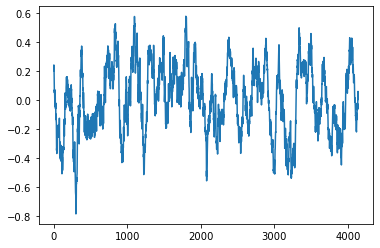

In [13]:
ww2 = np.convolve(d2, np.ones((60,))/60, mode='valid')
mean = np.nanmean(ww2)
plt.plot(ww2)

In [14]:
d4 = d2.reshape(350,12)
d5 = np.nanmean(d4,axis=1)

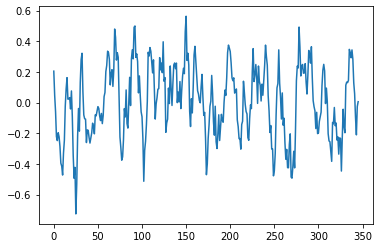

In [15]:
ww2 = np.convolve(d5, np.ones((5,))/5, mode='valid')
mean = np.nanmean(ww2)
plt.plot(ww2)

In [16]:
np.savetxt('RMPD40W30E.out',ww2)

In [17]:
dd65 = -final65[1560:5760]

In [18]:
d4 = dd65.reshape(350,12)
d5 = np.nanmean(d4,axis=1)

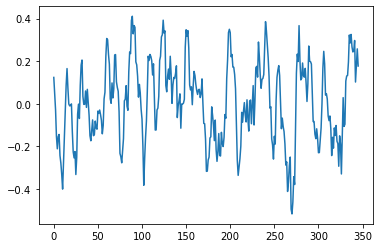

In [19]:
ww265 = np.convolve(d5, np.ones((5,))/5, mode='valid')
mean = np.nanmean(ww265)
plt.plot(ww265)

In [20]:
np.savetxt('RMPD40W30E65.out',ww265)

In [21]:
dd40 = final40[1560:5760]

In [24]:
d440 = dd40.reshape(350,12)
d540 = np.nanmean(d440,axis=1)

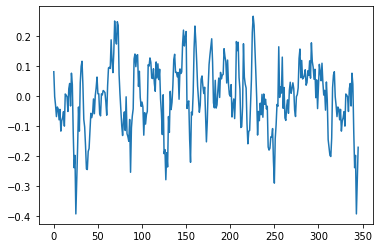

In [25]:
ww240 = np.convolve(d540, np.ones((5,))/5, mode='valid')
mean = np.nanmean(ww240)
plt.plot(ww240)

In [26]:
np.savetxt('RMPD40W30E40.out',ww240)